In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF, SHMR, scatter_stat
import galhalo
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [3]:
# as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
# as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

# as_data[:, 0] = 0.0  # removing the host mass from the matrix
# zero_mask = as_data != 0.0 #masking the padding!
# Mh = np.log10(np.where(zero_mask, as_data, np.nan)) #switching the to nans!

# max_real = Mh.shape[1] - np.sum(np.isnan(Mh),axis=1) # counting the maximum # of real subhalos in all realizations
# int = min(max_real)
# Mh = Mh[:, 1:int]

#np.save("../figures/Mh_clean.npy", Mh)
#Mh = np.load("../../data/Mh_clean.npy")

### Investigating the rank ordered subhalo mass distribution

In [4]:
def mass_rank(mass):

    rank = np.flip(np.argsort(mass,axis=1), axis=1) # rank the subhalos from largest to smallest

    ranked_mass = np.take_along_axis(mass, rank, axis=1) # this is it!!!

    return rank, ranked_mass
    

In [5]:
rank, sort = mass_rank(Mh)

NameError: name 'Mh' is not defined

In [ ]:
ave = np.mean(sort, axis=0) #some standard statistics
std = np.std(sort, axis=0)
Nrank = ave.shape[0]

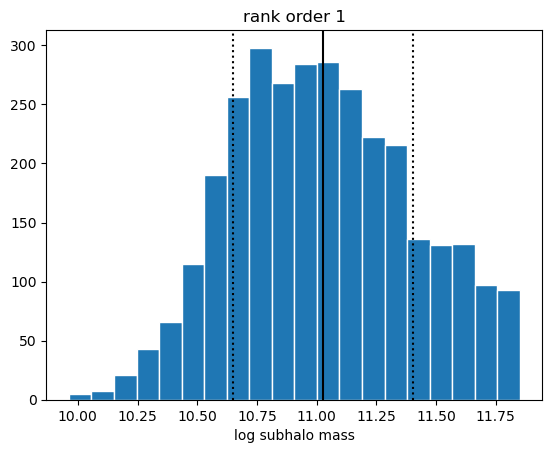

In [ ]:
i = 0
plt.title("rank order "+str(i+1))
plt.axvline(ave[i], color="black")
plt.axvline(ave[i]+std[i], ls=":", color="black")
plt.axvline(ave[i]-std[i], ls=":", color="black")
plt.hist(sort[:,i], bins=20, edgecolor="white")
plt.xlabel("log subhalo mass")
plt.show()

### Now working in stellar mass

In [ ]:
Ms = galhalo.lgMs_D22_det(Mh)

rank_s, sort_s = mass_rank(Ms)

In [ ]:
det_ave = np.mean(sort_s, axis=0) #some standard statistics
det_std = np.std(sort_s, axis=0)

In [ ]:
det_ave.shape

(167,)

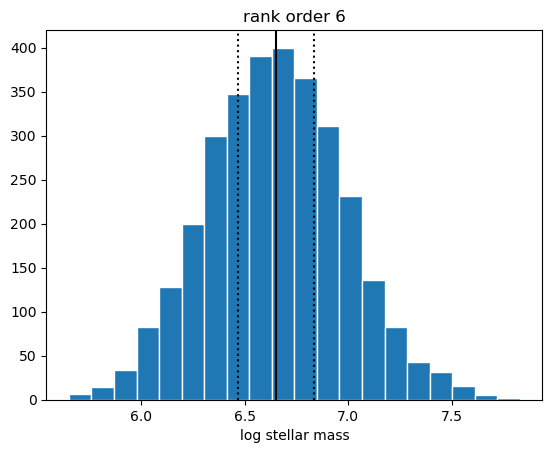

In [ ]:
i = 5
plt.title("rank order "+str(i+1))
plt.axvline(det_ave[i], color="black")
plt.axvline(det_ave[i]+std[i], ls=":", color="black")
plt.axvline(det_ave[i]-std[i], ls=":", color="black")
plt.hist(sort_s[:,i], bins=20, edgecolor="white")
plt.xlabel("log stellar mass")
plt.show()

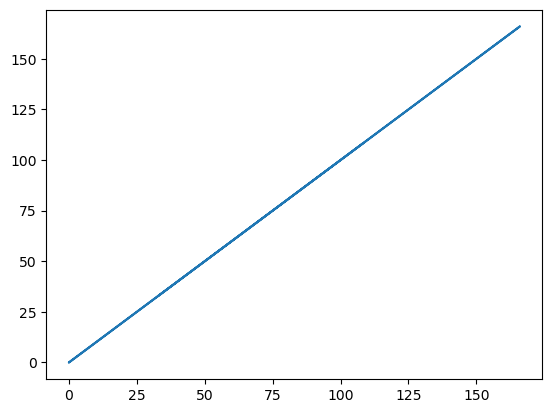

In [ ]:
plt.plot(rank[:,1], rank_s[:,1])
plt.show()

### now trying an array of scatter values for several samples

In [ ]:
mat = np.load("../../data/4D.npy")

In [ ]:
across_samp = np.average(mat, axis=3)

In [ ]:
cut = across_samp[:,:,0:167] # so it has the same shape as sort_s

cut[0].shape == sort_s.shape

True

In [ ]:
#now to sort the scattered sample!

scatter_sort = np.zeros(shape=cut.shape)

scatter_aves = np.zeros(shape=(cut.shape[0], cut.shape[2]))

scatter_stds = np.zeros(shape=(cut.shape[0], cut.shape[2]))


for i in range(cut.shape[0]):

    yeet, yah = mass_rank(cut[i])

    scatter_sort[i] = yah

    scatter_aves[i] = np.mean(yah, axis=0)

    scatter_stds[i] = np.std(yah, axis=0)

In [ ]:
scatter_aves.shape

(25, 167)

In [ ]:
scatter_range = np.round(np.linspace(0.1,0.5,25), 3)

Text(0, 0.5, '<M 5>')

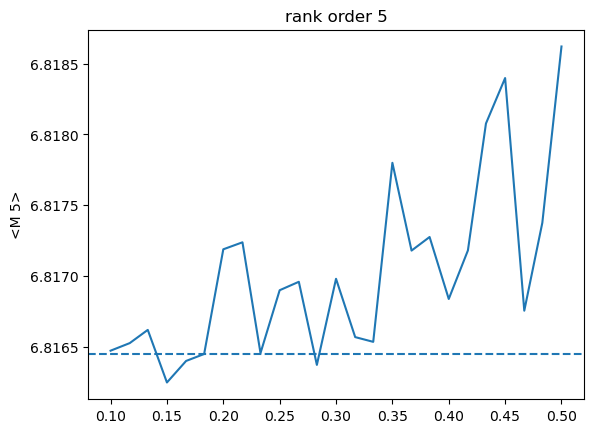

In [ ]:
i = 4

plt.title("rank order "+str(i+1))
plt.plot(scatter_range, scatter_aves[:,i])
plt.axhline(det_ave[i], ls="--")
plt.ylabel("<M "+str(i+1)+">")

Text(0, 0.5, '<$\\sigma_M$ 5>')

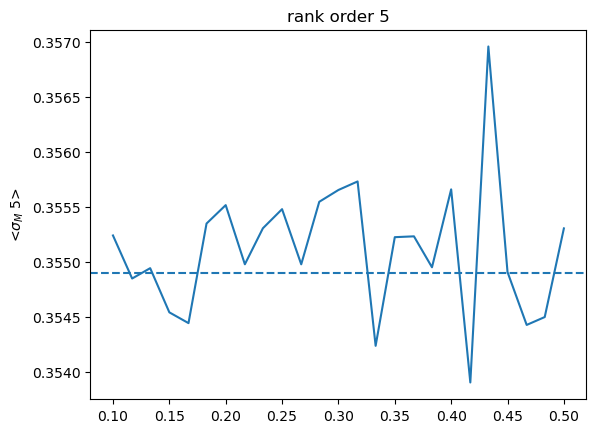

In [ ]:
i = 4

plt.title("rank order "+str(i+1))
plt.plot(scatter_range, scatter_stds[:,i])
plt.axhline(det_std[i], ls="--")
plt.ylabel("<$\sigma_M$ "+str(i+1)+">")

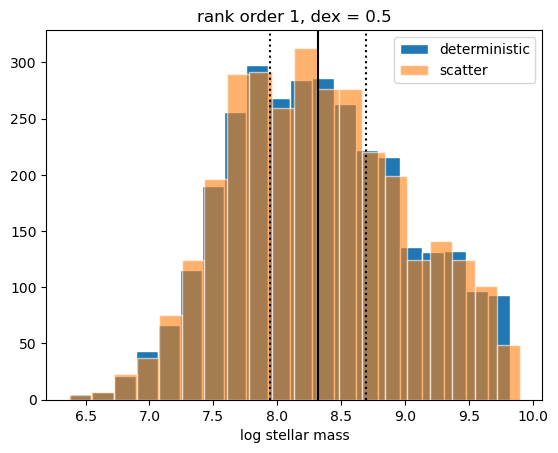

In [ ]:
i = 0
j = 24
plt.title("rank order "+str(i+1)+", dex = "+str(scatter_range[j]))
plt.axvline(det_ave[i], color="black")
plt.axvline(det_ave[i]+std[i], ls=":", color="black")
plt.axvline(det_ave[i]-std[i], ls=":", color="black")
plt.hist(sort_s[:,i], bins=20, edgecolor="white", label="deterministic")
plt.hist(scatter_sort[j,:,i], bins=20, edgecolor="white", label="scatter", alpha=0.6)
plt.xlabel("log stellar mass")
plt.legend()
plt.show()